In [1]:
import numpy as np

In [2]:
def sigmoid(x, derivative=False):
    """
    Parameters:
        x: array_like
        derivative: bool to specify whether to calculate derivative or not
        
    Returns:
        numpy array of sigmoid of x
    """
    return 1. / (1. + np.exp(-x)) if not derivative else x * (1. - x)

In [3]:
class Dense:
    def __init__(self, nodes, func=sigmoid):
        """
        Parameters:
            nodes: array_like. Number of neurons in each layer
            func: activation funcion
            
        Returns:
            Dense object
        """
        self.__func = func
        self.__nodes = np.array(nodes)
        
        self.__neurons = [np.empty([node, 1]) for node in nodes]
        self.__weights = [np.random.uniform(-1., 1., [nodes[i + 1], nodes[i]]) for i in range(len(nodes) - 1)]
        self.__biases = [np.random.uniform(-1., 1., [nodes[i + 1], 1]) for i in range(len(nodes) - 1)]
        
        self.__reset_deltas()
        
    def __reset_deltas(self):
        self.__delta_weights = [np.zeros([self.__nodes[i + 1], self.__nodes[i]]) for i in range(len(self.__nodes) - 1)]
        self.__delta_biases = [np.zeros([self.__nodes[i + 1], 1]) for i in range(len(self.__nodes) - 1)]
    
    def get_delta_weights(self):
        return self.__delta_weights
        
    def guess(self, x):
        """
        Parameters:
            x: 2d-array. Inputs of the network
            
        Returns:
            numpy array. Output of the network
        """
        output = np.empty([len(x), self.__nodes[-1], 1])
        for i, cur_input in enumerate(x):
            self.__neurons[0] = np.array(cur_input).reshape(-1, 1)
            for j in range(len(self.__neurons) - 1):
                self.__neurons[j + 1] = self.__func(self.__weights[j] @ self.__neurons[j] + self.__biases[j])

            output[i] = self.__neurons[-1]
        return output
    
    def train(self, x, y, batch_size=128, epochs_num=1, lr=0.01):
        """
        Parameters:
            x: 2d-array. Inputs of the network
            y: 2d-array. Expected outputs of the network
            batch_size: int. Number of inputs used during each training step
            epochs_num: int. Number of epochs
            lr: float. Learning rate of the training process
        """
        assert len(x) == len(y)
        
        for _ in range(epochs_num):
            for step in range(len(x) // batch_size):
                self.__reset_deltas()
                for cur_input, cur_output in zip(x[batch_size * step: batch_size * (step + 1)], \
                                                 y[batch_size * step: batch_size * (step + 1)]):
                    self.__neurons[0] = np.array(cur_input).reshape(-1, 1)
                    for i in range(len(self.__neurons) - 1):
                        self.__neurons[i + 1] = self.__func(self.__weights[i] @ self.__neurons[i] + self.__biases[i])
                        
                    error = cur_output.reshape(-1, 1) - self.__neurons[-1]
                    grad = self.__func(self.__neurons[-1], True) * error
                    self.__delta_weights[-1] += (grad @ self.__neurons[-2].transpose())
                    self.__delta_biases[-1] += grad

                    for i in range(len(self.__nodes) - 3, -1, -1):
                        error = self.__weights[i + 1].transpose() @ error
                        grad = self.__func(self.__neurons[i + 1], True) * error
                        self.__delta_weights[i] += (grad @ self.__neurons[i].transpose())
                        self.__delta_biases[i] += grad
                        
                for i in range(len(self.__weights)):
                    self.__weights[i] += (self.__delta_weights[i] * lr / batch_size)
                    self.__biases[i] += (self.__delta_biases[i] * lr / batch_size)

In [4]:
possible_inputs  = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
possible_outputs = np.array([[0]   , [1]   , [1]   , [0]])

indexes = np.random.uniform(0, 4, [1280]).astype(int)
inputs = possible_inputs[indexes]
outputs = possible_outputs[indexes]

In [5]:
nn = Dense([2, 4, 4, 1])
for i in range(1, 16):
    nn.train(inputs, outputs, batch_size=16, epochs_num=5, lr = 1)
    print("after %d epochs:\n" % (5 * i))
    print(nn.guess(possible_inputs))

after 5 epochs:

[[[0.4722089 ]]

 [[0.48271822]]

 [[0.46605263]]

 [[0.47165173]]]
after 10 epochs:

[[[0.13889428]]

 [[0.86376844]]

 [[0.76607484]]

 [[0.20001587]]]
after 15 epochs:

[[[0.03147937]]

 [[0.96033147]]

 [[0.95467987]]

 [[0.04453006]]]
after 20 epochs:

[[[0.02207371]]

 [[0.97436412]]

 [[0.97153292]]

 [[0.0273176 ]]]
after 25 epochs:

[[[0.01795539]]

 [[0.98011968]]

 [[0.97832635]]

 [[0.02025731]]]
after 30 epochs:

[[[0.01550294]]

 [[0.98323041]]

 [[0.9819676 ]]

 [[0.01653593]]]
after 35 epochs:

[[[0.01384206]]

 [[0.98520189]]

 [[0.98424901]]

 [[0.01421511]]]
after 40 epochs:

[[[0.01262746]]

 [[0.98659168]]

 [[0.98584174]]

 [[0.01260366]]]
after 45 epochs:

[[[0.0116933 ]]

 [[0.98764316]]

 [[0.98703827]]

 [[0.01141212]]]
after 50 epochs:

[[[0.0109479 ]]

 [[0.9884775 ]]

 [[0.98798232]]

 [[0.01049518]]]
after 55 epochs:

[[[0.01033579]]

 [[0.98916185]]

 [[0.98875242]]

 [[0.00976849]]]
after 60 epochs:

[[[0.00982143]]

 [[0.98973684]]

 [[

In [6]:
possible_inputs  = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
possible_outputs = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])

indexes = np.random.uniform(0, 4, [1280]).astype(int)
inputs = possible_inputs[indexes]
outputs = possible_outputs[indexes]

In [7]:
nn = Dense([2, 4, 4, 2])
for i in range(1, 16):
    nn.train(inputs, outputs, batch_size=16, epochs_num=5, lr = 1)
    print("after %d epochs:\n" % (5 * i))
    print(nn.guess(possible_inputs))

after 5 epochs:

[[[0.06245625]
  [0.95396445]]

 [[0.9162007 ]
  [0.07082477]]

 [[0.90845489]
  [0.08436432]]

 [[0.10053592]
  [0.89903607]]]
after 10 epochs:

[[[0.02888124]
  [0.98058516]]

 [[0.96534531]
  [0.02702335]]

 [[0.96025948]
  [0.03597459]]

 [[0.04322705]
  [0.95844936]]]
after 15 epochs:

[[[0.02133357]
  [0.98539605]]

 [[0.97513953]
  [0.01960295]]

 [[0.97164759]
  [0.02545924]]

 [[0.03084945]
  [0.9711464 ]]]
after 20 epochs:

[[[0.01765617]
  [0.98758089]]

 [[0.9797765 ]
  [0.01614965]]

 [[0.97707814]
  [0.02048123]]

 [[0.02492708]
  [0.9770239 ]]]
after 25 epochs:

[[[0.01539831]
  [0.9888907 ]]

 [[0.98258625]
  [0.01406613]]

 [[0.98037217]
  [0.01749331]]

 [[0.0213302 ]
  [0.98049323]]]
after 30 epochs:

[[[0.01383856]
  [0.98979226]]

 [[0.98450944]
  [0.0126409 ]]

 [[0.98262556]
  [0.0154713 ]]

 [[0.01886807]
  [0.98281593]]]
after 35 epochs:

[[[0.01268039]
  [0.99046573]]

 [[0.98592629]
  [0.01158959]]

 [[0.98428354]
  [0.01399784]]

 [[0.017055

In [8]:
test_imgs_filename = "mnist/t10k-images.idx3-ubyte"
test_labels_filename = "mnist/t10k-labels.idx1-ubyte"
train_imgs_filename = "mnist/train-images.idx3-ubyte"
train_labels_filename = "mnist/train-labels.idx1-ubyte"

test_imgs_file = open(test_imgs_filename, "rb")
test_labels_file = open(test_labels_filename, "rb")
train_imgs_file = open(train_imgs_filename, "rb")
train_labels_file = open(train_labels_filename, "rb")

LABEL_OFFSET = 8
IMG_OFFSET = 16
IMG_SIZE = 784
LABEL_SIZE = 1
TEST_SIZE = 10000
TRAIN_SIZE = 60000

In [9]:
test_imgs = np.empty([TEST_SIZE, IMG_SIZE], dtype=np.uint8)
test_labels = np.empty([TEST_SIZE, 10], dtype=np.float64)
train_imgs = np.empty([TRAIN_SIZE, IMG_SIZE], dtype=np.uint8)
train_labels = np.empty([TRAIN_SIZE, 10], dtype=np.float64)

In [10]:
test_imgs_file.seek(IMG_OFFSET)
for i in range(len(test_imgs)):
    cur_img = test_imgs_file.read1(IMG_SIZE)
    cur_img = np.array([cur_img[j] for j in range(len(cur_img))])
    test_imgs[i] = cur_img
    
test_labels_file.seek(LABEL_OFFSET)
for i in range(len(test_labels)):
    cur_label = test_labels_file.read1(LABEL_SIZE)
    cur_label = np.array([cur_label[j] for j in range(len(cur_label))])
    test_labels[i] = np.zeros([10])
    test_labels[i][cur_label] = 1.
    
train_imgs_file.seek(IMG_OFFSET)
for i in range(len(train_imgs)):
    cur_img = train_imgs_file.read1(IMG_SIZE)
    cur_img = np.array([cur_img[j] for j in range(len(cur_img))])
    train_imgs[i] = cur_img
    
train_labels_file.seek(LABEL_OFFSET)
for i in range(len(train_labels)):
    cur_label = train_labels_file.read1(LABEL_SIZE)
    cur_label = np.array([cur_label[j] for j in range(len(cur_label))])
    train_labels[i] = np.zeros([10])
    train_labels[i][cur_label] = 1.

In [11]:
test_imgs = test_imgs / 255.0
train_imgs = train_imgs / 255.0

In [12]:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
p = np.random.permutation(len(train_imgs))
train_imgs = train_imgs[p]
train_labels = train_labels[p]

p = np.random.permutation(len(test_imgs))
test_imgs = test_imgs[p]
test_labels = test_labels[p]

del p

In [14]:
nn = Dense([784, 32, 32, 10])
np.set_printoptions(suppress=True)

outputs = nn.guess(test_imgs)
accuracy = 0
for j in range(len(test_imgs)):
    if np.argmax(outputs[j]) == np.argmax(test_labels[j]):
        accuracy += 1
accuracy /= len(test_imgs)
print("Accuracy after %d epoch(s): %f" %((0), accuracy))

for i in range(1, 16):
    nn.train(train_imgs, train_labels, batch_size=256, epochs_num=1, lr=.1)
    outputs = nn.guess(test_imgs)
    
    accuracy = 0
    for j in range(len(test_imgs)):
        if np.argmax(outputs[j]) == np.argmax(test_labels[j]):
            accuracy += 1
    accuracy /= len(test_imgs)
    print("Accuracy after %d epoch(s): %f" %((i), accuracy))

Accuracy after 0 epoch(s): 0.077900
Accuracy after 1 epoch(s): 0.675400
Accuracy after 2 epoch(s): 0.779700
Accuracy after 3 epoch(s): 0.821700
Accuracy after 4 epoch(s): 0.845500
Accuracy after 5 epoch(s): 0.861700
Accuracy after 6 epoch(s): 0.873200
Accuracy after 7 epoch(s): 0.881400
Accuracy after 8 epoch(s): 0.887600
Accuracy after 9 epoch(s): 0.892300
Accuracy after 10 epoch(s): 0.896300
Accuracy after 11 epoch(s): 0.900400
Accuracy after 12 epoch(s): 0.902800
Accuracy after 13 epoch(s): 0.906000
Accuracy after 14 epoch(s): 0.908100
Accuracy after 15 epoch(s): 0.909300


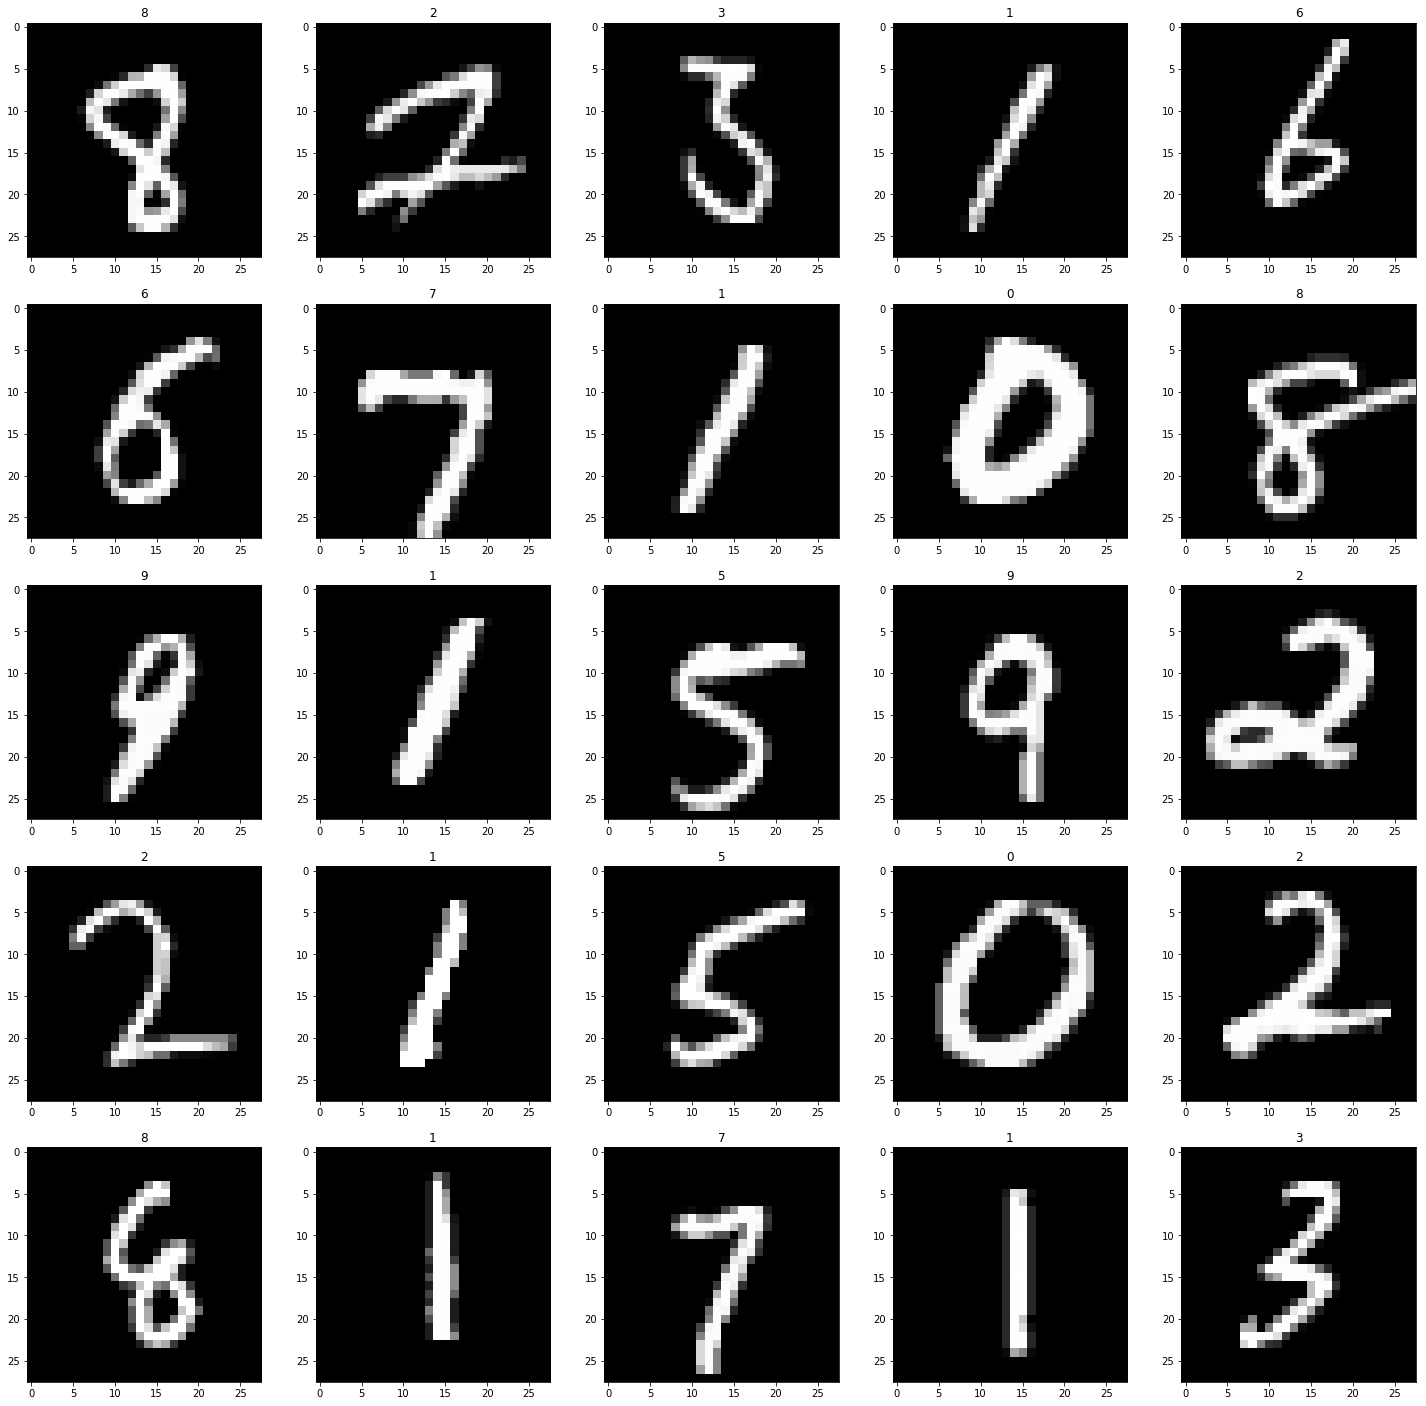

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(5, 5, figsize=(25, 25))
for i in range(5):
    for j in range(5):
        index = j + i * 5
        axs[i][j].imshow(test_imgs[index].reshape(28, 28), cmap="gray")
        axs[i][j].set_title(np.argmax(test_labels[index]))

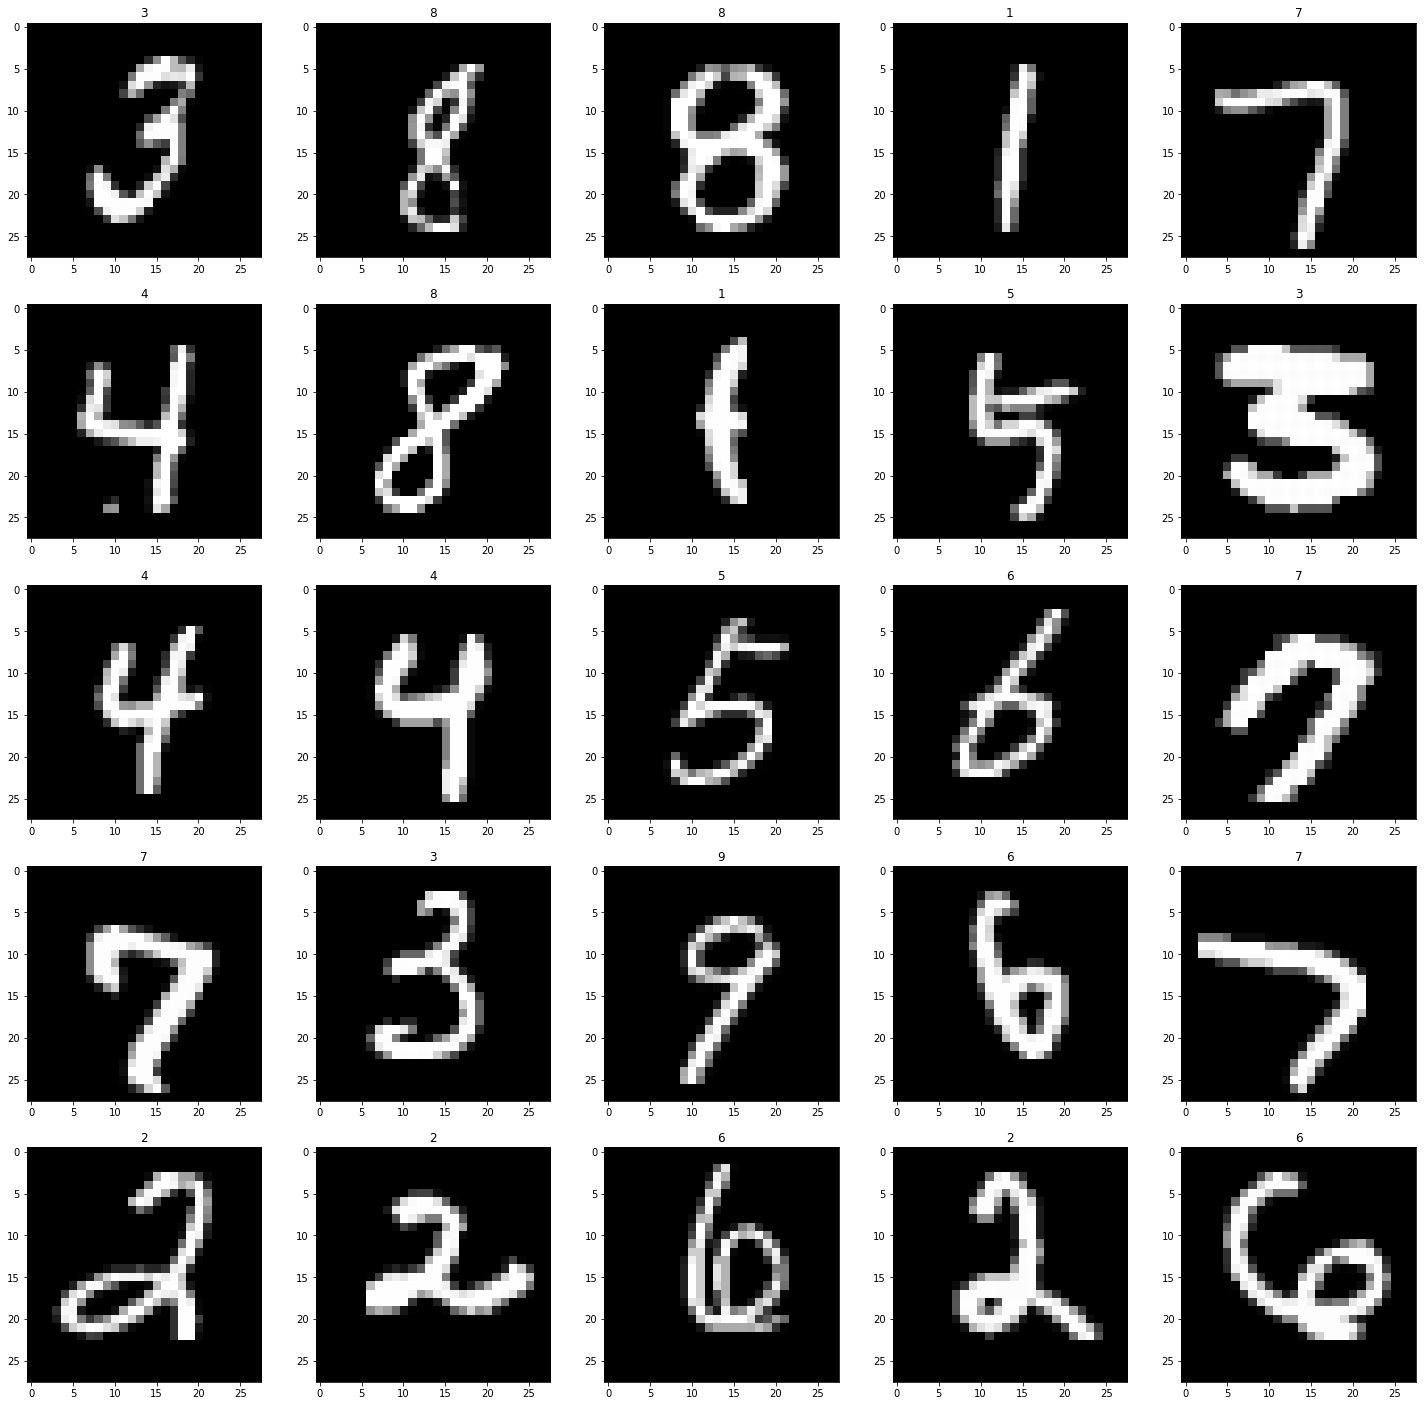

In [16]:
%matplotlib inline

fig, axs = plt.subplots(5, 5, figsize=(25, 25))
for i in range(5):
    for j in range(5):
        index = j + i * 5
        axs[i][j].imshow(train_imgs[index].reshape(28, 28), cmap="gray")
        axs[i][j].set_title(np.argmax(train_labels[index]))